In [1]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt
#import seaborn as sb

In [2]:
# Create a sample dataset:
genes = ['gene' + str(i) for i in range(1, 101)]

In [3]:
# Knockout and wildtype samples:
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]

In [4]:
# Added the * to unpack the values of both lists.
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [5]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [20]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,918,963,894,928,945,356,371,370,334,355
gene2,440,444,435,421,494,581,572,608,584,636
gene3,890,826,801,828,797,250,279,241,251,250
gene4,189,209,151,192,184,686,616,637,646,684
gene5,242,253,231,223,211,612,611,614,549,582


In [7]:
# Center and scale data to have average value of 0
# and a standard deviation of 1.

scaled_data = preprocessing.scale(data.T) 
# ^ a transpose is necessary due to our DataFrame.

In [8]:
# Alternatively:
# scaled_data = StandardScaler().fit_transform(data.T)

In [9]:
pca = PCA()

In [10]:
# Calculate the loading scores and variation for each PC.
pca.fit(scaled_data)

PCA()

In [11]:
pca_data = pca.transform(scaled_data)

In [12]:
# Calculate percent of variation for each Principal Component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [13]:
# Create labels for the scree plot.
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 

Text(0.5, 1.0, 'Scree Plot')

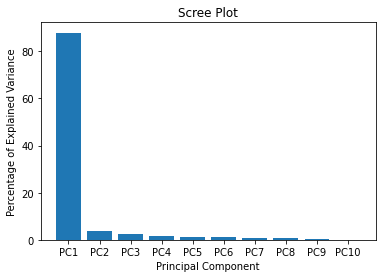

In [14]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')

In [15]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)

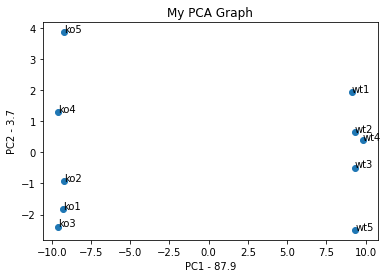

In [16]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel(f'PC1 - {per_var[0]}')
plt.ylabel(f'PC2 - {per_var[1]}')

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [17]:
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values

In [18]:
# Get the 'contribution score for each gene.'
loading_scores[top_10_genes]

gene84   -0.106600
gene39   -0.106563
gene91    0.106533
gene31   -0.106526
gene18   -0.106512
gene51   -0.106509
gene26    0.106502
gene14   -0.106493
gene27   -0.106483
gene20   -0.106456
dtype: float64